In [78]:
import matplotlib.pyplot as py
import numpy as np
from matplotlib import rcParams

#print(py.style.available)
py.style.use('ggplot')
rcParams['figure.figsize'] = 12, 10

x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0, 0.15, len(x))
#fig, ax = py.subplots(figsize=(20,12))


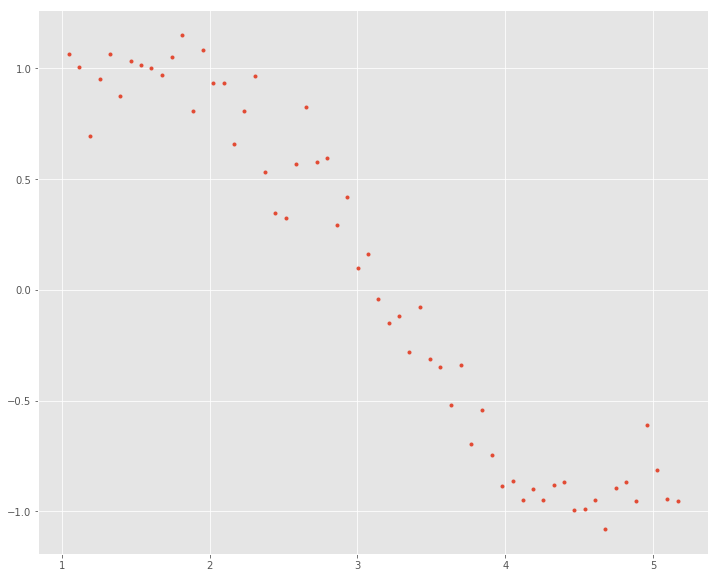

In [79]:
# data frame panda ~sort of dictionary
import pandas as pd

data = pd.DataFrame(np.column_stack((x,y)), columns=['x','y'])
#print(data.keys)
py.plot(data['x'], data['y'], '.')

In [86]:
def power_x():
    for pow in range (2, 16):
        col_name = 'x_%d' %pow 
        data[col_name] = [np.power(x,pow) for x in data['x']]
        
power_x()
#print(data.columns)

In [120]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def Linear(data, power, model_to_power):
    predictors = ['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)]) #power seen as feature
    
    regr = linear_model.LinearRegression()
    regr.fit(data[predictors], data['y'])
    
    y_pred = regr.predict(data[predictors])
    if power in model_to_plot:
        plt = py.subplot(model_to_plot[power])
        py.tight_layout()
        py.title('Linear Regression of power %d' %power)
        plt.plot(data['x'],data['y'])
        plt.plot(data['x'],y_pred)
    
    err = sum((y_pred - data['y'])**2) #square of distance
    ret = [err]
    ret.extend([regr.intercept_])
    ret.extend(regr.coef_)
    
    return ret

def LinearWithPipeline(data, power, model_to_power):
    predictors = ['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)]) #power seen as feature
    
    polynomial_features = PolynomialFeatures(degree=power,
                                             include_bias=False)
    linear_regression = linear_model.LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    regr = pipeline.fit(data['x'][:,np.newaxis], data['y'])

    y_pred = regr.predict(data['x'][:,np.newaxis])
    
    if power in model_to_plot:
        plt = py.subplot(model_to_plot[power])
        py.tight_layout()
        py.title('Linear Regression of power %d' %power)
        plt.plot(data['x'],data['y'])
        plt.plot(data['x'],y_pred)
    
    err = sum((y_pred - data['y'])**2) #square of distance
    ret = [err]
    ret.extend([linear_regression.intercept_])
    ret.extend(linear_regression.coef_)
    return ret

,err,intercept,coeff_pow_1,coeff_pow_2,coeff_pow_3,coeff_pow_4,coeff_pow_5,coeff_pow_6,coeff_pow_7,coeff_pow_8,coeff_pow_9,coeff_pow_10,coeff_pow_11,coeff_pow_12,coeff_pow_13,coeff_pow_14,coeff_pow_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


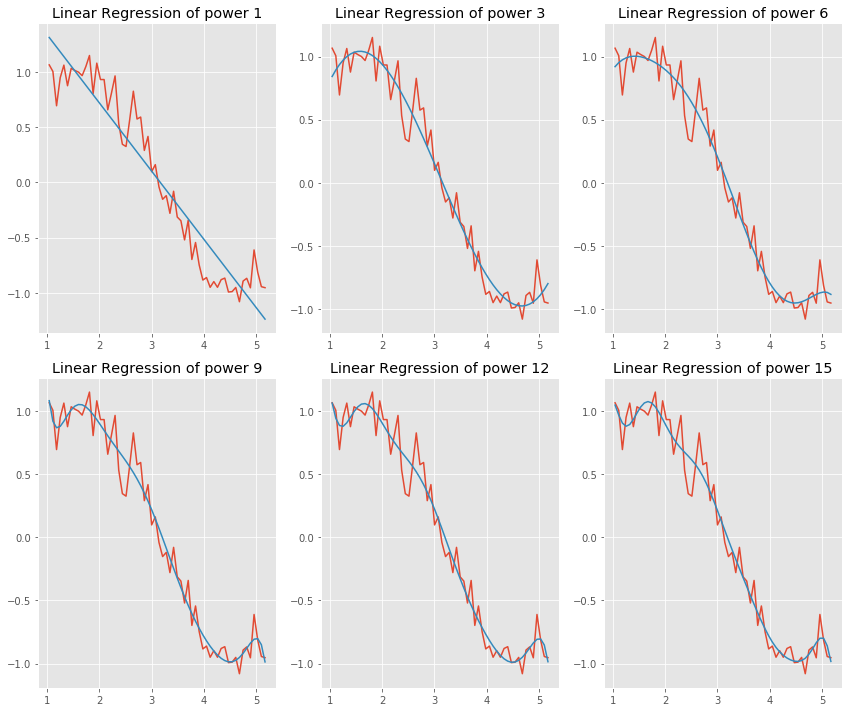

In [121]:
model_to_plot={1:231, 3:232, 6:233, 9:234, 12:235, 15:236}
#model_to_plot

rows = ['model_pow_%d'%i for i in range(1,16)]
columns =  ['err', 'intercept'] + ['coeff_pow_%d'%i for i in range(1,16)]

matrix = pd.DataFrame(index=rows, columns=columns)

for i in range(1,16):
    matrix.iloc[i-1,0:i+2] = LinearWithPipeline(data,i,model_to_plot) #Linear(data,i,model_to_plot)

pd.options.display.float_format = '{:,.2g}'.format
matrix
#predictions = ['x']
#predictions.extend('x_%d'%i for i in range(2, 4))
#print(predictions)

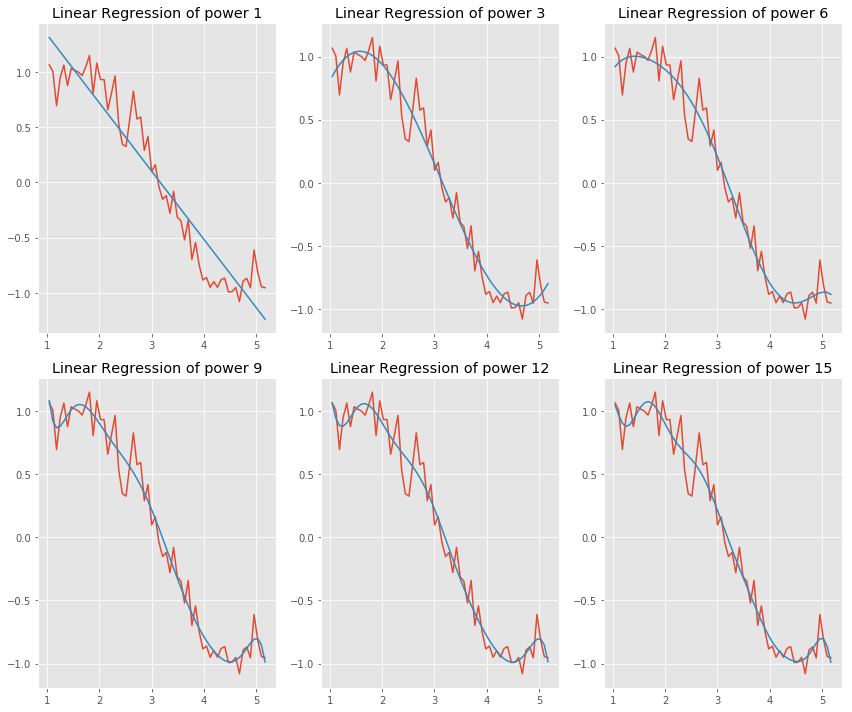

In [123]:
model_to_plot={1:231, 3:232, 6:233, 9:234, 12:235, 15:236}
#model_to_plot

rows = ['model_pow_%d'%i for i in range(1,16)]
columns =  ['err', 'intercept'] + ['coeff_pow_%d'%i for i in range(1,16)]

matrix = pd.DataFrame(index=rows, columns=columns)

for i in range(1,16):
    matrix.iloc[i-1,0:i+2] = Linear(data,i,model_to_plot)

pd.options.display.float_format = '{:,.2g}'.format

#matrix

C:\Users\MIKA\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.493840e-17
  overwrite_a=True).T


,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,94,-3e+02,3.8e+02,-2.3e+02,65,0.56,-4.3,0.39,0.2,-0.028,-0.0069,0.0012,0.00019,-5.6e-05,4.1e-06,-7.8e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


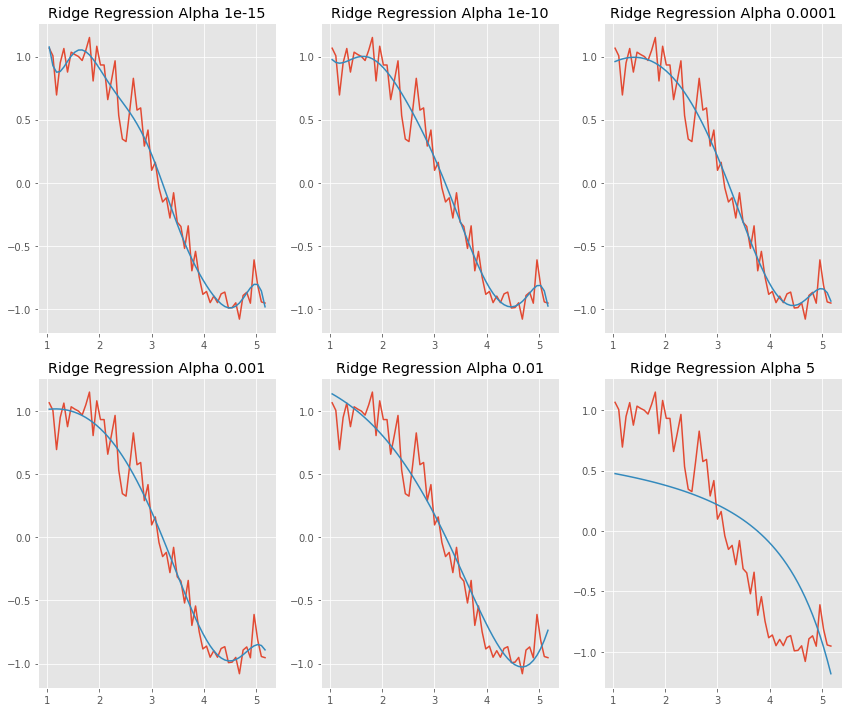

In [128]:

def Ridge(data, predictors, alpha, model_to_alpha):
    regr = linear_model.Ridge(alpha=alpha,normalize=True)
    regr.fit(data[predictors], data['y'])
    y_pred = regr.predict(data[predictors])
    
    if alpha in model_to_alpha:
        plt = py.subplot(model_to_alpha[alpha])
        py.tight_layout()
        py.title('Ridge Regression Alpha {:,.2g}'.format(alpha))
        plt.plot(data['x'],data['y'])
        plt.plot(data['x'],y_pred)
    
    err = sum((y_pred - data['y'])**2) #square of distance
    ret = [err]
    ret.extend([regr.intercept_])
    ret.extend(regr.coef_)
    
    return ret

alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = Ridge(data, predictors, alpha_ridge[i], models_to_plot)

coef_matrix_ridge
# same err with linear regression with alpha very small
# alpha prevents overfitting but alpha big conducts to underfitting
# coefficients much smaller with regularization
#coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)
sum(coef_matrix_ridge.values==0, axis=1)

In [133]:

def Ridge(data, predictors, alpha, model_to_alpha):
    regr = linear_model.Ridge(alpha=alpha,normalize=True)
    regr.fit(data[predictors], data['y'])
    y_pred = regr.predict(data[predictors])
    
    if alpha in model_to_alpha:
        plt = py.subplot(model_to_alpha[alpha])
        py.tight_layout()
        py.title('Ridge Regression Alpha {:,.2g}'.format(alpha))
        plt.plot(data['x'],data['y'])
        plt.plot(data['x'],y_pred)
    
    err = sum((y_pred - data['y'])**2) #square of distance
    ret = [err]
    ret.extend([regr.intercept_])
    ret.extend(regr.coef_)
    
    return ret

alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = Ridge(data, predictors, alpha_ridge[i], models_to_plot)

coef_matrix_ridge
# same err with linear regression with alpha very small
# alpha prevents overfitting but alpha big conducts to underfitting
# coefficients much smaller with regularization
#coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)
sum(coef_matrix_ridge.values==0, axis=1)

10

C:\Users\MIKA\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,2.9e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
alpha_1e-10,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,2.9e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
alpha_1e-08,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,2.9e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
alpha_0.0001,1,0.61,0.6,-0.19,-0.022,-0,-0,1.1e-05,2.4e-05,3.2e-06,3.2e-07,4.4e-09,0,0,-0,-0,-2.9e-11
alpha_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
alpha_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_20,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


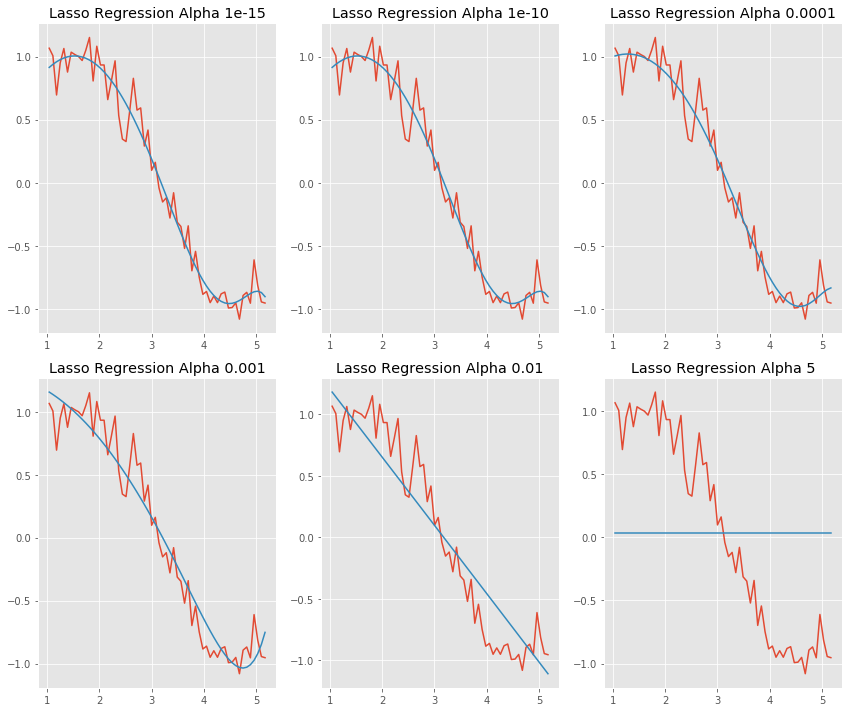

In [140]:

def Lasso(data, predictors, alpha, model_to_alpha):
    regr = linear_model.Lasso(alpha=alpha,normalize=True)
    regr.fit(data[predictors], data['y'])
    y_pred = regr.predict(data[predictors])
    
    if alpha in model_to_alpha:
        plt = py.subplot(model_to_alpha[alpha])
        py.tight_layout()
        py.title('Lasso Regression Alpha {:,.2g}'.format(alpha))
        plt.plot(data['x'],data['y'])
        plt.plot(data['x'],y_pred)
    
    err = sum((y_pred - data['y'])**2) #square of distance
    ret = [err]
    ret.extend([regr.intercept_])
    ret.extend(regr.coef_)
    
    return ret

alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_lasso.iloc[i,] = Lasso(data, predictors, alpha_lasso[i], models_to_plot)

coef_matrix_lasso
# Err higher
# coefficients converge to 0, reducing the dimens smaller with regularization
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)
coef_matrix_lasso